In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
num_data = pd.read_csv('Numbers.txt', sep=' ')
print(num_data.head())

   V1   V2   V3   V4     V5     V6     V7     V8     V9    V10  ...   V248  \
1   0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.972  0.178  1.000  0.689  ...  0.522   
2   9 -1.0 -1.0 -1.0 -1.000 -1.000 -0.815  0.268  0.640  0.869  ... -0.090   
3   8 -1.0 -1.0 -1.0 -1.000 -0.987 -0.806 -0.169  0.350  0.986  ...  0.873   
4  -9 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0.851  0.668 -0.858  ...  0.832   
5   8 -1.0 -1.0 -1.0 -0.928  0.162 -0.014 -0.210  0.999  1.000  ... -1.000   

    V249   V250   V251   V252   V253  V254  V255  V256  V257  
1  0.940  1.000  0.400 -0.337 -0.954  -1.0  -1.0  -1.0  -1.0  
2  0.990 -0.381 -1.000 -1.000 -1.000  -1.0  -1.0  -1.0  -1.0  
3  1.000  1.000  0.832  0.196 -0.714  -1.0  -1.0  -1.0  -1.0  
4 -0.017 -0.847 -1.000 -1.000 -1.000  -1.0  -1.0  -1.0  -1.0  
5 -0.683  0.711  1.000  0.320 -0.928  -1.0  -1.0  -1.0  -1.0  

[5 rows x 257 columns]


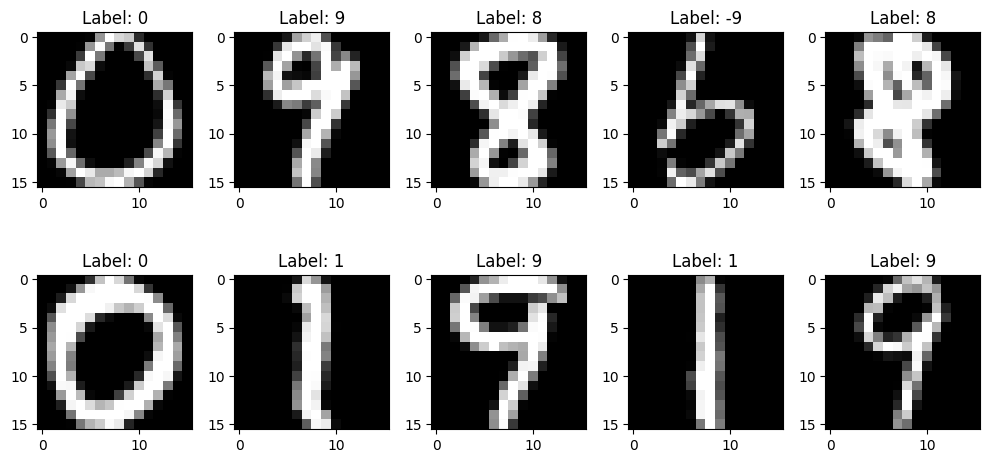

In [3]:
labels = num_data.iloc[:, 0].values
pixels = num_data.iloc[:, 1:].values

# Plotting multiple images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pixels[i].reshape(16, 16), cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
plt.tight_layout()
plt.show()

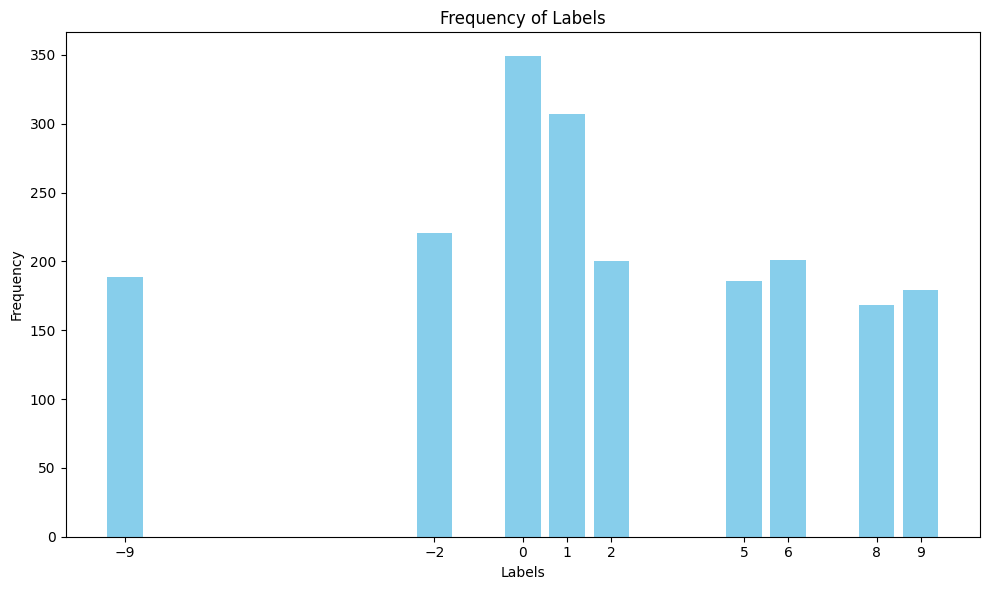

In [4]:
unique_labels, counts = np.unique(labels, return_counts=True)

# Plot the frequency of each label
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Labels')
plt.xticks(unique_labels)  # Ensure all labels are shown on the x-axis
plt.tight_layout()
plt.show()

## Part 1: explore at least 3 different classifiers of different character

In this task, we choose 4 different classifiers:

- K-Nearest Neighbors (KNN) Classifier
- Logistic Regression Classifier
- Random Forest Classifier
- Linear Discriminant Analysis (LDA) Classifier



<span style="color:red">Model and parameter setup</span>

In [ ]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis()
]

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
}
param_grid_lr = {
    'C': [0.01, 0.05, 0.08, 0.1, 0.25, 0.5, 1],  # Inverse of regularization strength            # Regularization type
}
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],    # Algorithm to use for LDA
}
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7],  # Number of neighbors to use
}
param_grids = {
    KNeighborsClassifier: param_grid_knn,
    LogisticRegression: param_grid_lr,
    RandomForestClassifier: param_grid_rf,
    LinearDiscriminantAnalysis: param_grid_lda
}

# Split the data into training and testing sets
# pixels, X_test, labels, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

1. **Perform cross-validation to compare the different models without tuning.**

In [46]:
def normal_cv(models, pixels, labels, size):
    model_names = []
    mean_scores = []
    std_devs = []
    models_scores = np.zeros((len(models), 5))

    if size < len(labels):
        X, _, y, _ = train_test_split(pixels, labels, train_size=size, stratify=labels)
    else:
        X = pixels
        y = labels

    for model in models:
        cv_scores = cross_val_score(model, X, y, cv=5)
        print(f"{model.__class__.__name__} CV Mean Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        model_names.append(model.__class__.__name__)
        mean_scores.append(cv_scores.mean())
        std_devs.append(cv_scores.std())
        models_scores[len(model_names) - 1] =cv_scores

    plt.figure(figsize=(10, 6))
    plt.boxplot([models_scores[0,:], models_scores[1,:], models_scores[2,:], models_scores[3,:]], labels=['kNN', 'LogReg', 'RandFor', 'LDA'])
    plt.title("Model Performance with data size = " + str(size))
    plt.ylabel("Accuracy")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return model_names, mean_scores, std_devs

KNeighborsClassifier CV Mean Score: 0.9205 ± 0.0110
LogisticRegression CV Mean Score: 0.9180 ± 0.0075
RandomForestClassifier CV Mean Score: 0.9255 ± 0.0099
LinearDiscriminantAnalysis CV Mean Score: 0.8895 ± 0.0091


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4152833658.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([models_scores[0,:], models_scores[1,:], models_scores[2,:], models_scores[3,:]], labels=['kNN', 'LogReg', 'RandFor', 'LDA'])


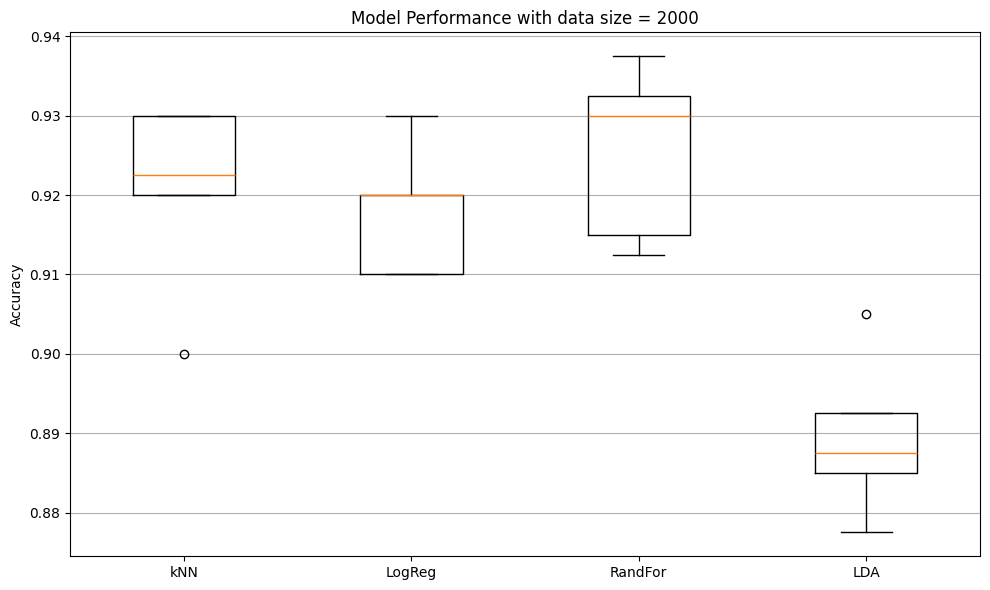

In [25]:
normal_cv(models, pixels, labels, len(pixels))

2. **Perform cross-validation to tune *and* compare the different models.**

In [52]:
def double_CV(X, y, model, param_grid):
    """
    Perform double cross-validation for hyperparameter tuning and model evaluation.
    
    Parameters:
    - X: pixels (features)
    - y: labels
    - model: The classifier model to evaluate
    - param_grid: Dictionary of hyperparameters to tune
    
    Returns:
    - mean_test_score: Mean test score across outer folds
    """
    # Outer cross-validation
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    training_errors = []
    cv_errors = []
    test_errors = []
    
    for train_idx, test_idx in outer_cv.split(X, y):
        # Split the data into training and testing sets
        X_train_outer, X_test_outer = X[train_idx], X[test_idx]
        y_train_outer, y_test_outer = y[train_idx], y[test_idx]
        
        # Perform inner cross-validation for hyperparameter tuning
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1, return_train_score=True)
        grid_search.fit(X_train_outer, y_train_outer)
        
        # Print the best parameters and the corresponding score
        best_index = grid_search.best_index_
        training_error = 1 - grid_search.cv_results_['mean_train_score'][best_index]
        cv_score = 1 - grid_search.cv_results_['mean_test_score'][best_index]
        training_errors.append(training_error)
        cv_errors.append(cv_score)

        best_params = grid_search.best_params_
        print(f"Best Params for Fold: {best_params}")
        
        # Train the model with the best parameters on the outer training set
        if model.__class__ == LogisticRegression:
            best_params['max_iter'] = 1000
        best_model = model.__class__(**best_params)
        best_model.fit(X_train_outer, y_train_outer)

        # Evaluate the model on the outer test set
        test_accuracy = best_model.score(X_test_outer, y_test_outer)
        test_error = 1 - test_accuracy
        test_errors.append(test_error)

    print(f"Training Errors: {training_errors}")
    print(f"CV Errors: {cv_errors}")
    print(f"Test Errors: {test_errors}")
    print(f"Mean Test Error: {np.mean(test_errors):.4f} ± {np.std(test_errors):.4f}")

    # Plotting the distribution of errors
    plt.figure(figsize=(8, 6))
    plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])
    plt.title("Error Distribution for model " + model.__class__.__name__)
    # plt.ylim(0, 0.15)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.ylabel("Error")
    plt.show()

    return np.mean(test_errors), np.std(test_errors)


Evaluating KNeighborsClassifier...
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 3}
Best Params for Fold: {'n_neighbors': 3}
Best Params for Fold: {'n_neighbors': 5}
Best Params for Fold: {'n_neighbors': 3}
Training Errors: [np.float64(0.0), np.float64(0.03734375000000012), np.float64(0.04125000000000012), np.float64(0.05265625000000007), np.float64(0.04093750000000007)]
CV Errors: [np.float64(0.07187500000000002), np.float64(0.07125000000000004), np.float64(0.07437500000000008), np.float64(0.08062500000000006), np.float64(0.07562499999999994)]
Test Errors: [0.06499999999999995, 0.07999999999999996, 0.08499999999999996, 0.06499999999999995, 0.07750000000000001]
Mean Test Error: 0.0745 ± 0.0081


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_38468\1666612354.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


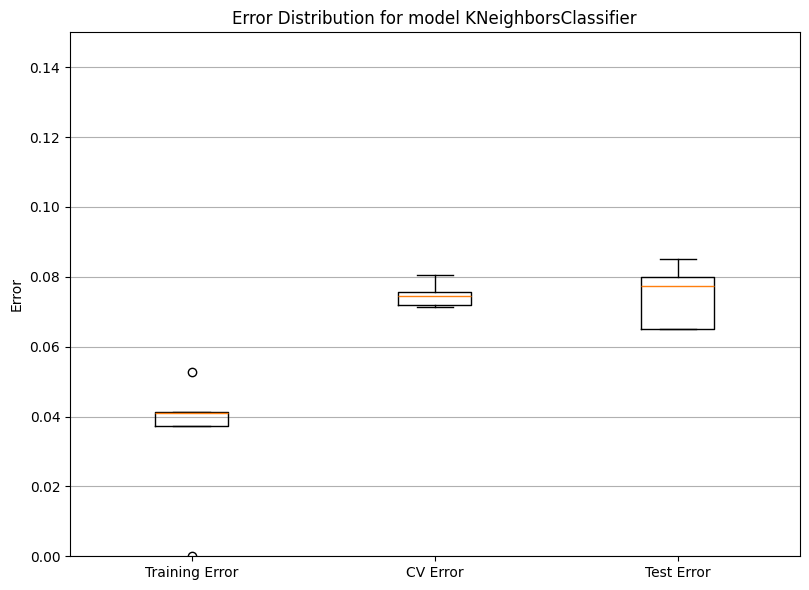

Evaluating LogisticRegression...
Best Params for Fold: {'C': 0.1}
Best Params for Fold: {'C': 0.1}
Best Params for Fold: {'C': 0.1}
Best Params for Fold: {'C': 0.1}
Best Params for Fold: {'C': 0.1}
Training Errors: [np.float64(0.020312499999999956), np.float64(0.01734374999999999), np.float64(0.01734374999999988), np.float64(0.01578125000000008), np.float64(0.01593750000000005)]
CV Errors: [np.float64(0.07999999999999985), np.float64(0.08125000000000004), np.float64(0.07750000000000001), np.float64(0.08125000000000004), np.float64(0.08250000000000013)]
Test Errors: [0.07499999999999996, 0.09250000000000003, 0.07999999999999996, 0.07750000000000001, 0.06999999999999995]
Mean Test Error: 0.0790 ± 0.0075


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_38468\1666612354.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


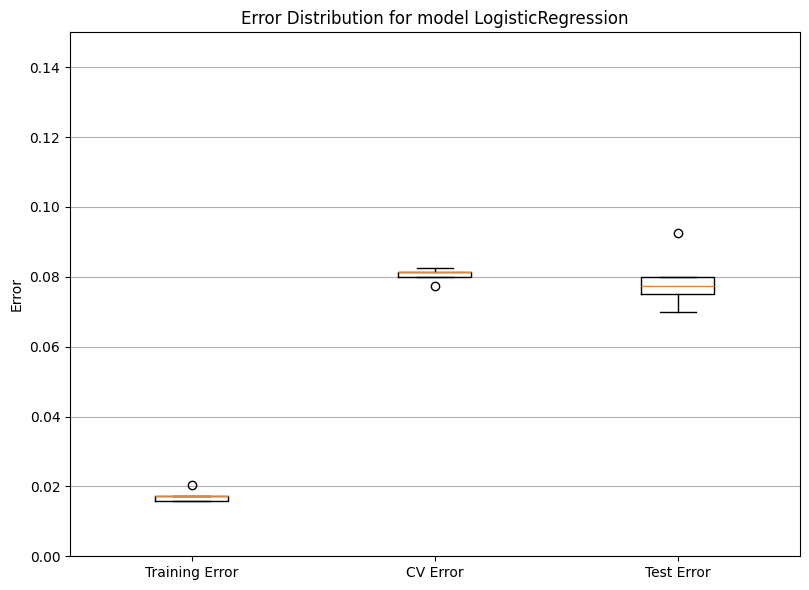

Evaluating RandomForestClassifier...
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Params for Fold: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0006249999999999867), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.0668749999999999), np.float64(0.06624999999999992), np.float64(0.06374999999999997), np.float64(0.0674999999999999), np.float64(0.06812499999999999)]
Test Errors: [0.0675, 0.07750000000000001, 0.08250000000000002, 0.050000000000000044, 0.05500000000000005]
Mean Test Error: 0.0665 ± 0.0125


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_38468\1666612354.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


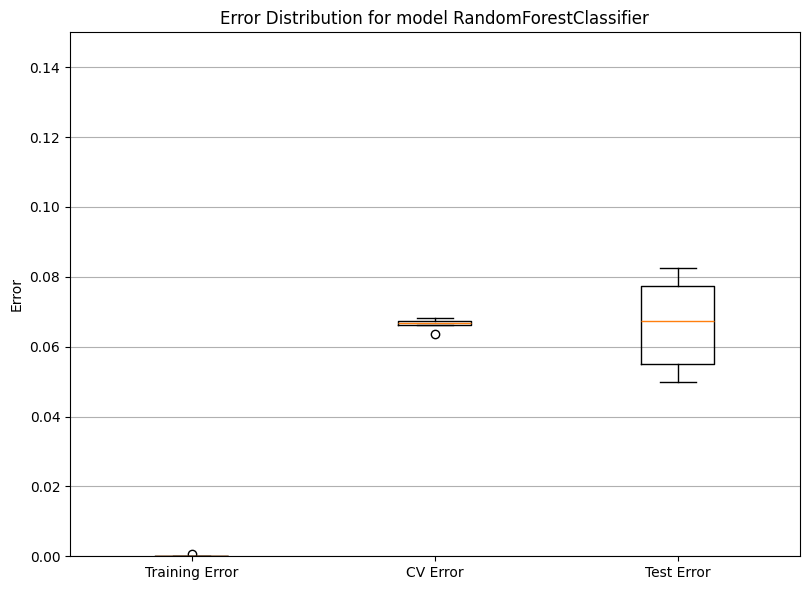

Evaluating LinearDiscriminantAnalysis...
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Training Errors: [np.float64(0.03749999999999998), np.float64(0.03937499999999994), np.float64(0.03453125000000001), np.float64(0.03953124999999991), np.float64(0.03843750000000001)]
CV Errors: [np.float64(0.1293749999999999), np.float64(0.11187500000000006), np.float64(0.11562499999999998), np.float64(0.12249999999999994), np.float64(0.1187499999999998)]
Test Errors: [0.10250000000000004, 0.13, 0.11499999999999999, 0.08999999999999997, 0.10999999999999999]
Mean Test Error: 0.1095 ± 0.0133


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_38468\1666612354.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


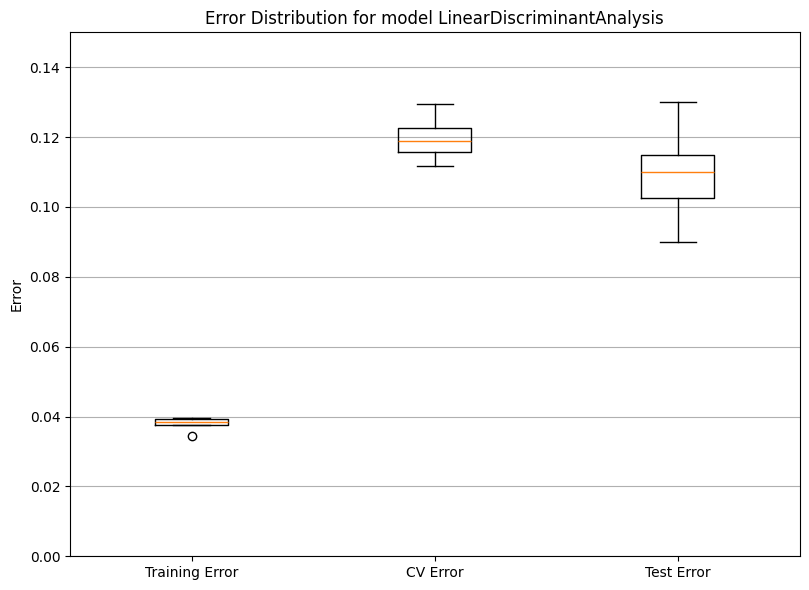

In [ ]:

classifiers_test_errors = {}
for model in models:
    print(f"Evaluating {model.__class__.__name__}...")
    param_grid = param_grids[model.__class__]
    classifiers_test_errors[model.__class__.__name__] = double_CV(pixels, labels, model, param_grid)

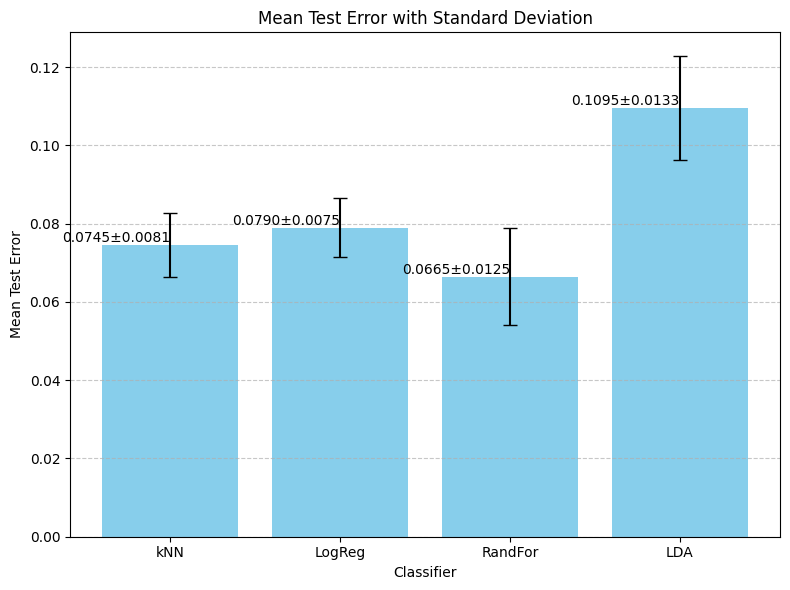

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(classifiers_test_errors.keys(), [v[0] for v in classifiers_test_errors.values()], yerr=[v[1] for v in classifiers_test_errors.values()], capsize=5, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Mean Test Error')
plt.xticks(ticks=range(len(['kNN', 'LogReg', 'RandFor', 'LDA'])), labels=['kNN', 'LogReg', 'RandFor', 'LDA'])
plt.title('Mean Test Error with Standard Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for i in range(len(classifiers_test_errors)):
    mean = classifiers_test_errors[list(classifiers_test_errors.keys())[i]][0]
    std = classifiers_test_errors[list(classifiers_test_errors.keys())[i]][1]
    plt.text(i, mean, f'{mean:.4f}±{std:.4f}' , ha='right', va='bottom', fontsize=10, color='black')

plt.show()



## Part 2: The influence of sample size to the 4 different models

In this task, we analyse the influence of sample size to the models. We use 5 different data size:

- 100
- 500
- 1000
- 1500

Evaluating with data size: 100
KNeighborsClassifier CV Mean Score: 0.6800 ± 0.0748
LogisticRegression CV Mean Score: 0.8000 ± 0.0837
RandomForestClassifier CV Mean Score: 0.7700 ± 0.1030
LinearDiscriminantAnalysis CV Mean Score: 0.5700 ± 0.0872


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\3013376216.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([models_scores[0,:], models_scores[1,:], models_scores[2,:], models_scores[3,:]], labels=['kNN', 'LogReg', 'RandFor', 'LDA'])


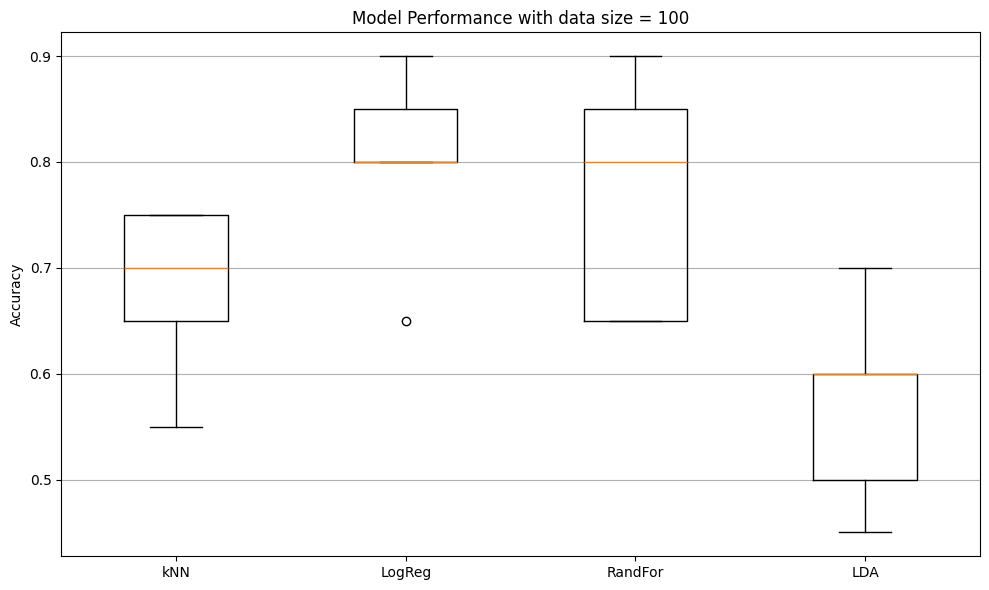

Evaluating with data size: 500
KNeighborsClassifier CV Mean Score: 0.8680 ± 0.0214
LogisticRegression CV Mean Score: 0.9200 ± 0.0110
RandomForestClassifier CV Mean Score: 0.9160 ± 0.0258
LinearDiscriminantAnalysis CV Mean Score: 0.7100 ± 0.0341


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\3013376216.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([models_scores[0,:], models_scores[1,:], models_scores[2,:], models_scores[3,:]], labels=['kNN', 'LogReg', 'RandFor', 'LDA'])


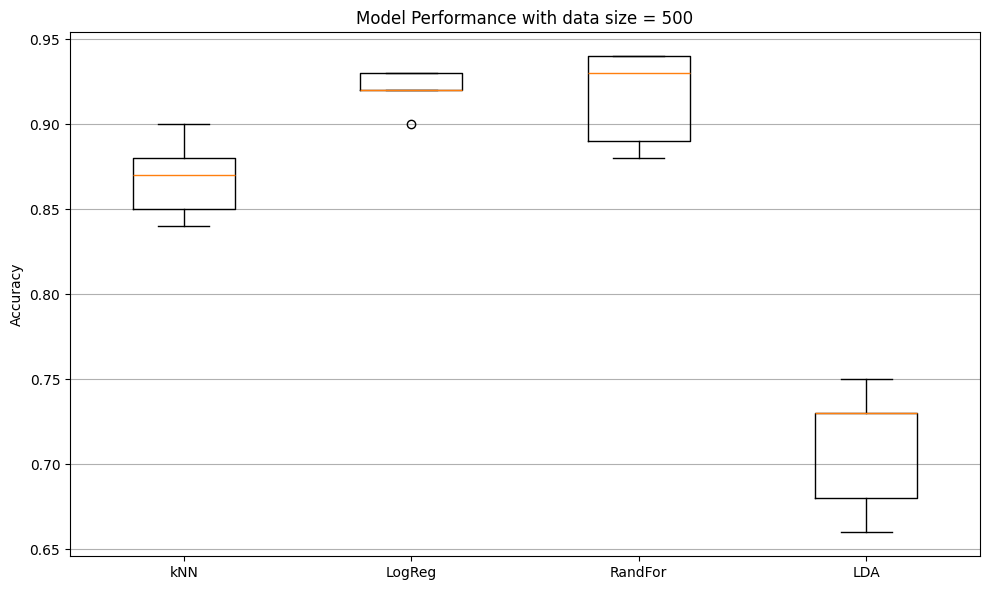

Evaluating with data size: 1000
KNeighborsClassifier CV Mean Score: 0.9060 ± 0.0235
LogisticRegression CV Mean Score: 0.9100 ± 0.0274
RandomForestClassifier CV Mean Score: 0.9150 ± 0.0243
LinearDiscriminantAnalysis CV Mean Score: 0.8590 ± 0.0267


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\3013376216.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([models_scores[0,:], models_scores[1,:], models_scores[2,:], models_scores[3,:]], labels=['kNN', 'LogReg', 'RandFor', 'LDA'])


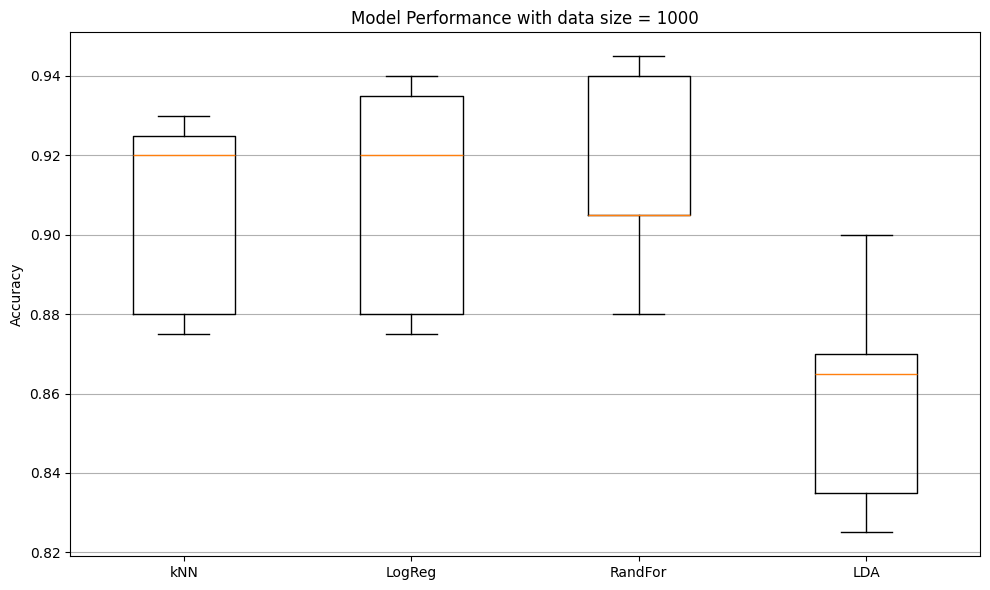

In [47]:
data_size = [100, 500, 1000]

mean_scores = np.zeros((len(models), len(data_size)))
std_devs = np.zeros((len(models), len(data_size)))

for size in data_size:
    print(f"Evaluating with data size: {size}")

    model_names, mean_scores[:, data_size.index(size)], std_devs[:, data_size.index(size)] = normal_cv(models, pixels, labels, size)



##### Plot the result for Question 2

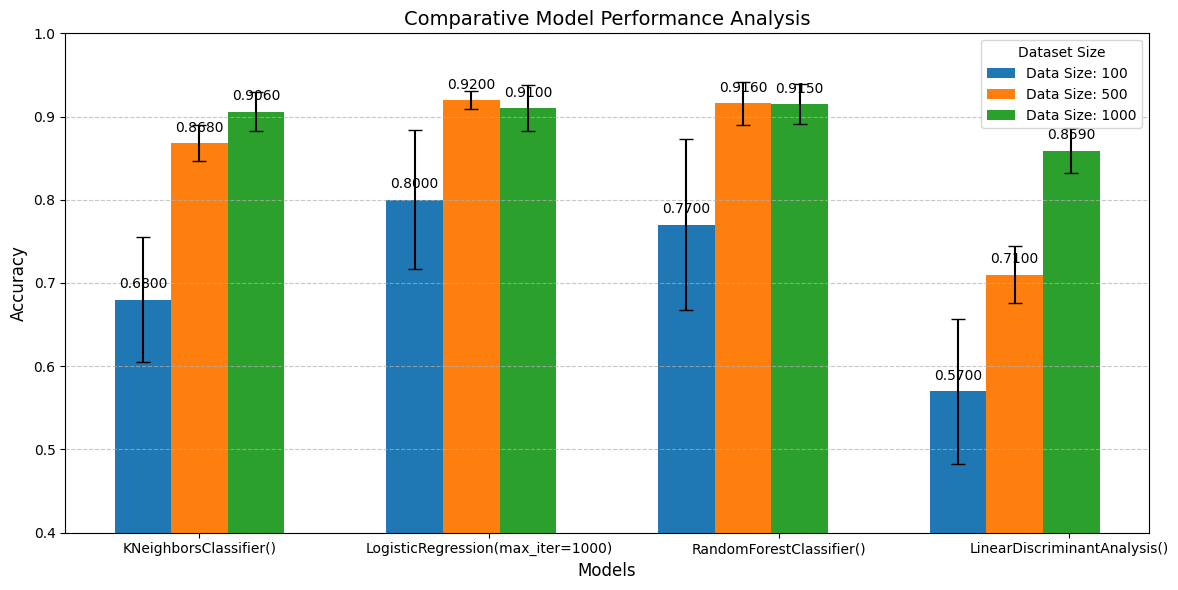

In [48]:
x = np.arange(len(models))
width = 0.25
group_space = 0.2
plt.figure(figsize=(12, 6))
for i in range(len(data_size)):
    acc = mean_scores[:, i]
    label = f"Data Size: {data_size[i]}"
    std = std_devs[:, i]
    plt.bar(x + i * width + group_space * x, acc, width, yerr=std, capsize=5, label=label)

    for j in range(len(acc)):
        value = acc[j]
        plt.text(x[j] + i * width + group_space * x[j], value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Comparative Model Performance Analysis', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x + group_space * x + width + 0.08*x, models) 
plt.ylim(0.4, 1.0) 
plt.legend(title='Dataset Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tuning models with data size: 100
Evaluating KNeighborsClassifier...
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 2}
Best Params for Fold: {'n_neighbors': 3}
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 1}
Training Errors: [np.float64(0.0), np.float64(0.11562499999999998), np.float64(0.16249999999999998), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.25), np.float64(0.23750000000000004), np.float64(0.26249999999999996), np.float64(0.1875), np.float64(0.25)]
Test Errors: [0.25, 0.35, 0.25, 0.35, 0.09999999999999998]
Mean Test Error: 0.2600 ± 0.0917


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


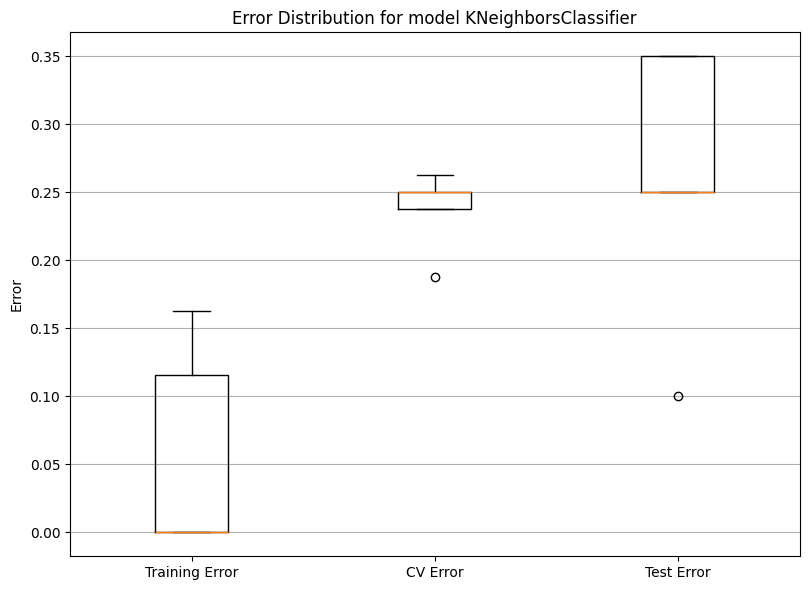

Evaluating LogisticRegression...
Best Params for Fold: {'C': 0.08}
Best Params for Fold: {'C': 0.08}
Best Params for Fold: {'C': 0.25}
Best Params for Fold: {'C': 0.05}
Best Params for Fold: {'C': 0.25}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.1875), np.float64(0.23750000000000004), np.float64(0.21250000000000002), np.float64(0.17500000000000004), np.float64(0.26249999999999996)]
Test Errors: [0.25, 0.35, 0.19999999999999996, 0.35, 0.050000000000000044]
Mean Test Error: 0.2400 ± 0.1114


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


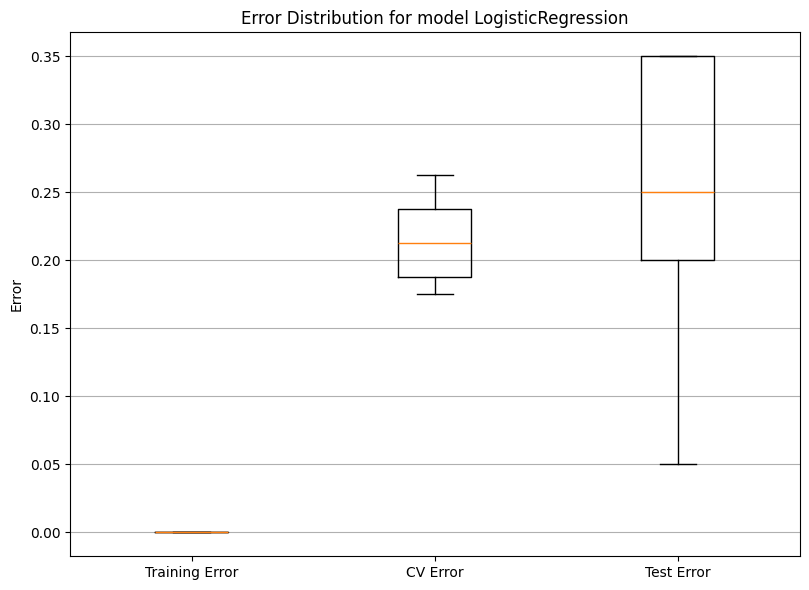

Evaluating RandomForestClassifier...
Best Params for Fold: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.22499999999999998), np.float64(0.17500000000000004), np.float64(0.25), np.float64(0.17500000000000004), np.float64(0.23750000000000004)]
Test Errors: [0.25, 0.35, 0.19999999999999996, 0.35, 0.09999999999999998]
Mean Test Error: 0.2500 ± 0.0949


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


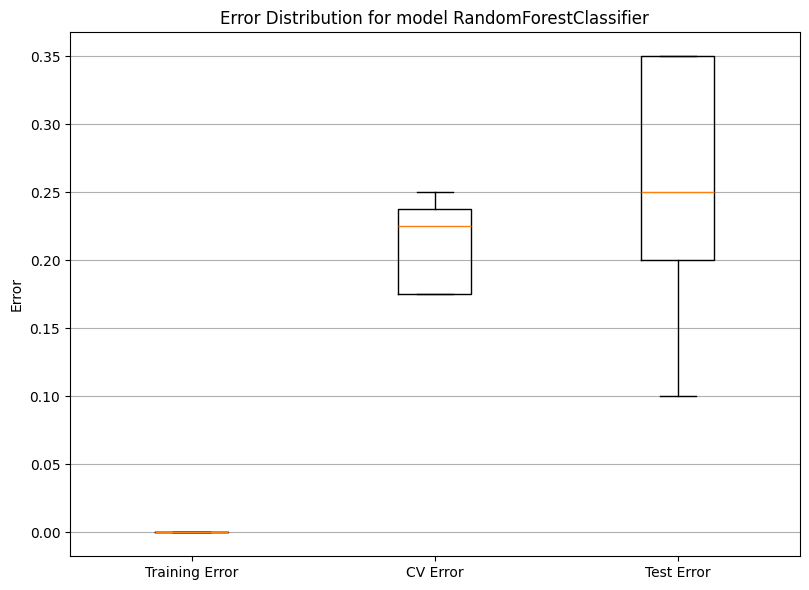

Evaluating LinearDiscriminantAnalysis...
Best Params for Fold: {'solver': 'svd'}


e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
    ~~~~~~~~~~~~~~~

Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}


e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
    ~~~~~~~~~~~~~~~

Best Params for Fold: {'solver': 'svd'}


e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\SOFTWARE\Python\Lib\site-packages\sklearn\discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
    ~~~~~~~~~~~~~~~

Best Params for Fold: {'solver': 'svd'}
Training Errors: [np.float64(0.0), np.float64(0.0031250000000000444), np.float64(0.006249999999999978), np.float64(0.0), np.float64(0.0031250000000000444)]
CV Errors: [np.float64(0.38749999999999996), np.float64(0.4625), np.float64(0.38749999999999996), np.float64(0.4125), np.float64(0.4375)]
Test Errors: [0.5, 0.55, 0.44999999999999996, 0.44999999999999996, 0.5]
Mean Test Error: 0.4900 ± 0.0374


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


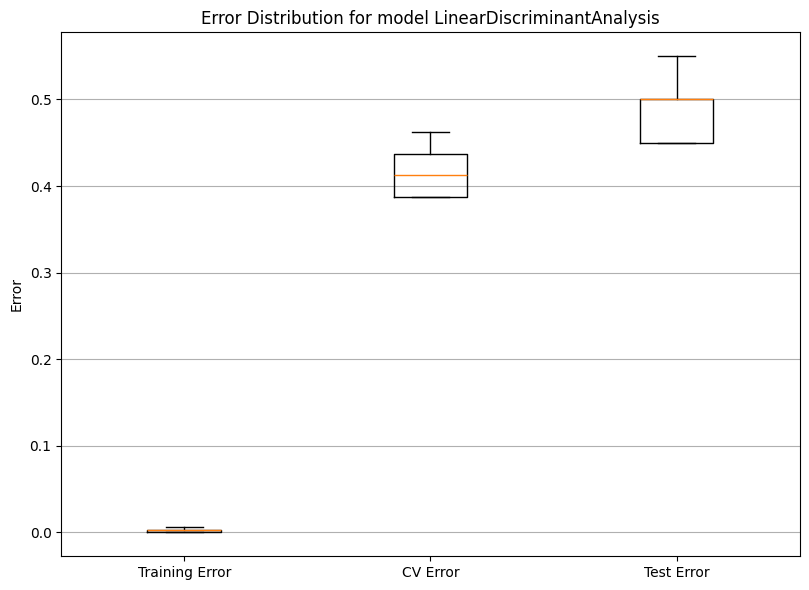

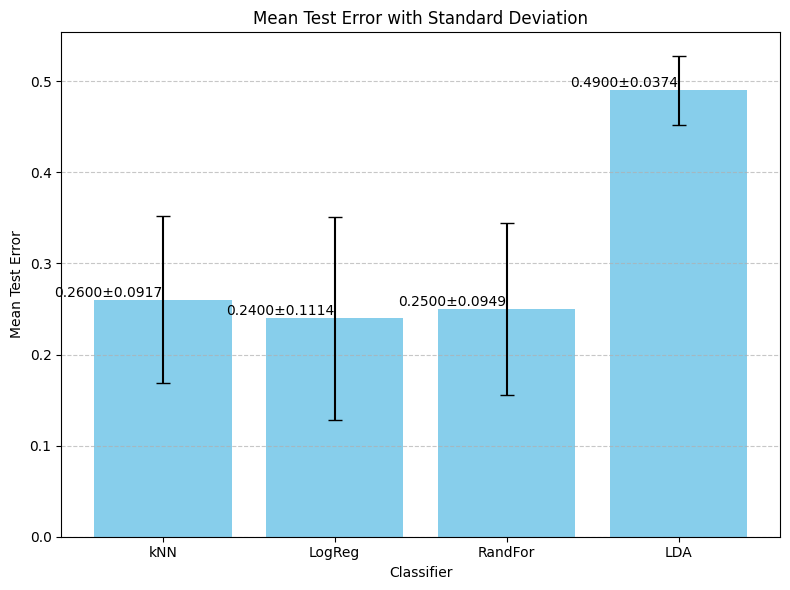

Tuning models with data size: 500
Evaluating KNeighborsClassifier...
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 3}
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 1}
Training Errors: [np.float64(0.0), np.float64(0.08499999999999996), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.14749999999999996), np.float64(0.15000000000000002), np.float64(0.10750000000000015), np.float64(0.125), np.float64(0.12249999999999994)]
Test Errors: [0.12, 0.14, 0.13, 0.10999999999999999, 0.15000000000000002]
Mean Test Error: 0.1300 ± 0.0141


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


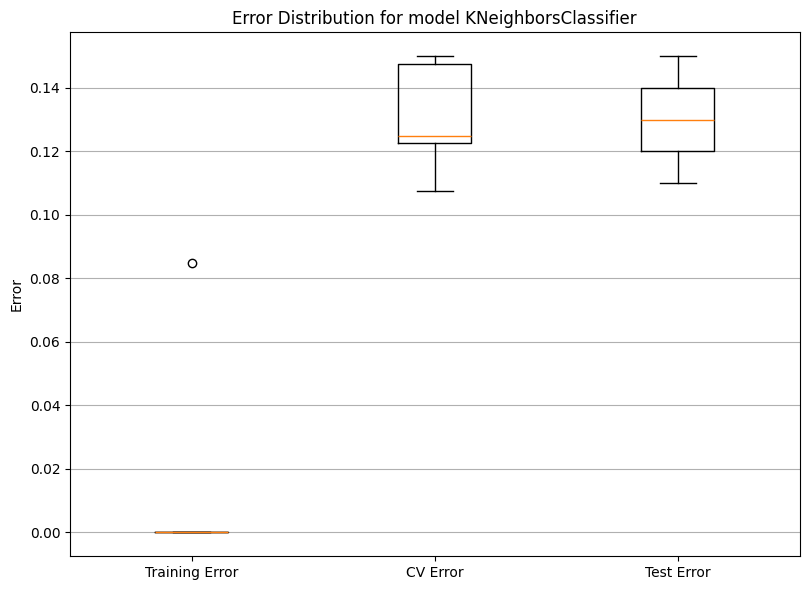

Evaluating LogisticRegression...
Best Params for Fold: {'C': 0.05}
Best Params for Fold: {'C': 0.01}
Best Params for Fold: {'C': 0.1}
Best Params for Fold: {'C': 0.05}
Best Params for Fold: {'C': 0.1}
Training Errors: [np.float64(0.02375000000000005), np.float64(0.05812500000000009), np.float64(0.0006249999999999867), np.float64(0.021874999999999978), np.float64(0.008750000000000036)]
CV Errors: [np.float64(0.11499999999999999), np.float64(0.12249999999999994), np.float64(0.10999999999999999), np.float64(0.11250000000000004), np.float64(0.11999999999999988)]
Test Errors: [0.12, 0.12, 0.10999999999999999, 0.12, 0.15000000000000002]
Mean Test Error: 0.1240 ± 0.0136


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


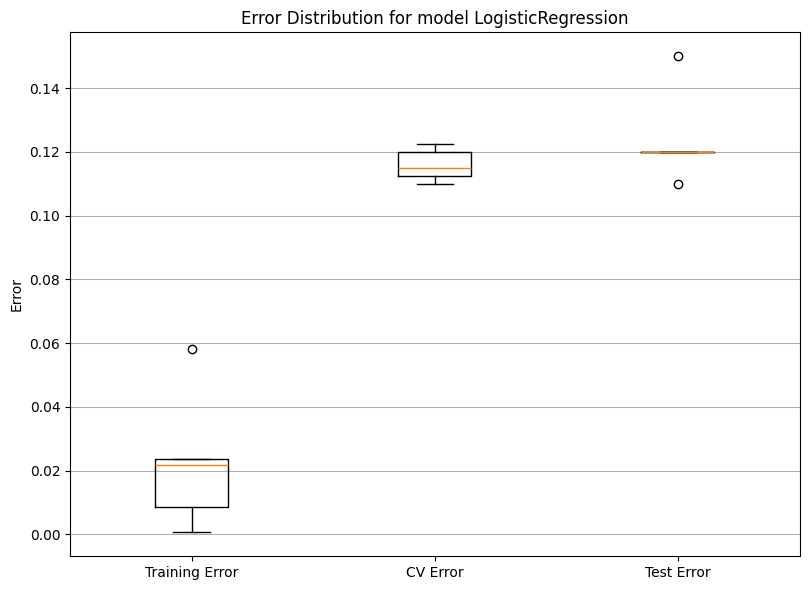

Evaluating RandomForestClassifier...
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.125), np.float64(0.11999999999999988), np.float64(0.09749999999999992), np.float64(0.10749999999999993), np.float64(0.11499999999999999)]
Test Errors: [0.10999999999999999, 0.10999999999999999, 0.13, 0.10999999999999999, 0.12]
Mean Test Error: 0.1160 ± 0.0080


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


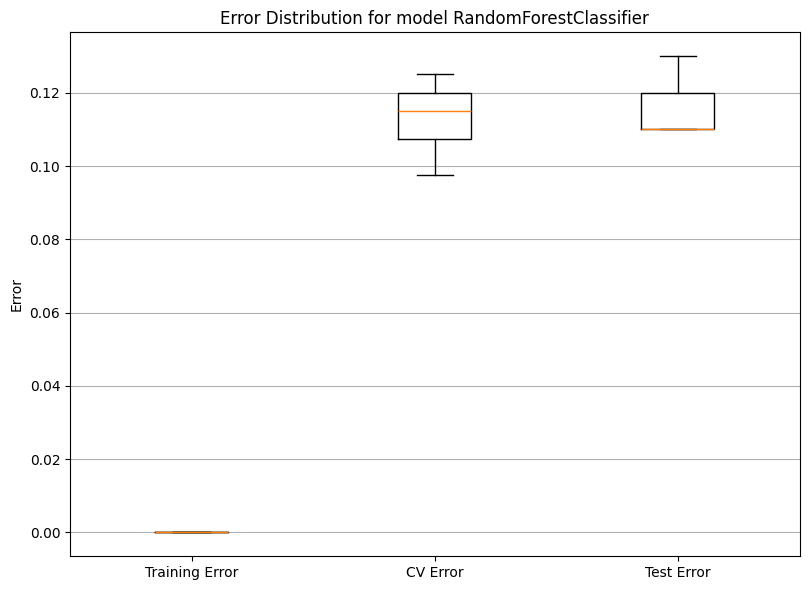

Evaluating LinearDiscriminantAnalysis...
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.4675), np.float64(0.42500000000000004), np.float64(0.45499999999999996), np.float64(0.48), np.float64(0.46499999999999997)]
Test Errors: [0.4, 0.38, 0.31000000000000005, 0.33999999999999997, 0.33999999999999997]
Mean Test Error: 0.3540 ± 0.0320


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


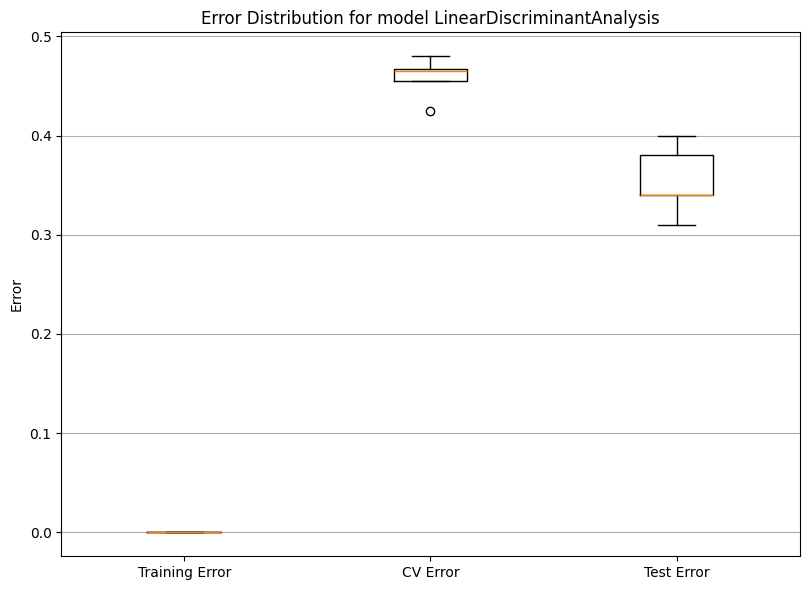

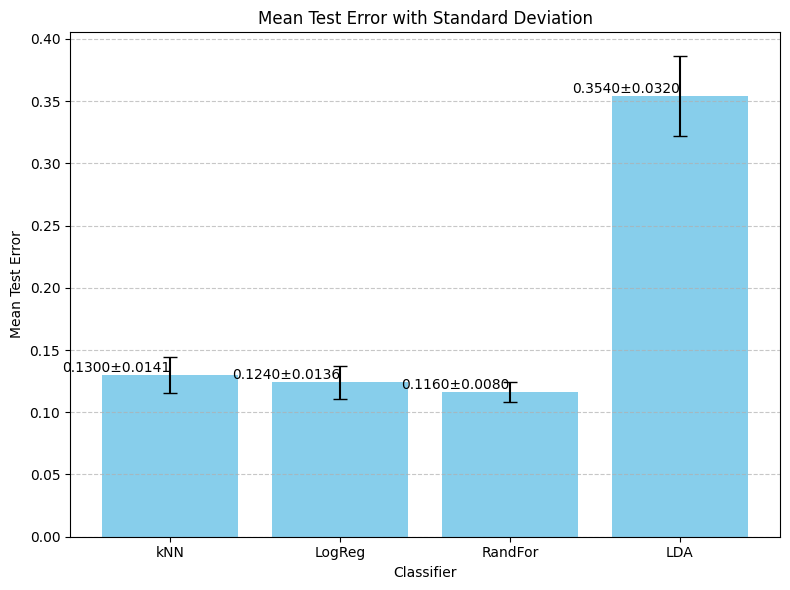

Tuning models with data size: 1000
Evaluating KNeighborsClassifier...
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 3}
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 1}
Best Params for Fold: {'n_neighbors': 3}
Training Errors: [np.float64(0.0), np.float64(0.06125000000000003), np.float64(0.0), np.float64(0.0), np.float64(0.048125000000000084)]
CV Errors: [np.float64(0.09625000000000006), np.float64(0.10250000000000004), np.float64(0.09249999999999992), np.float64(0.08999999999999986), np.float64(0.09375)]
Test Errors: [0.08999999999999997, 0.08499999999999996, 0.08499999999999996, 0.11499999999999999, 0.08499999999999996]
Mean Test Error: 0.0920 ± 0.0117


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


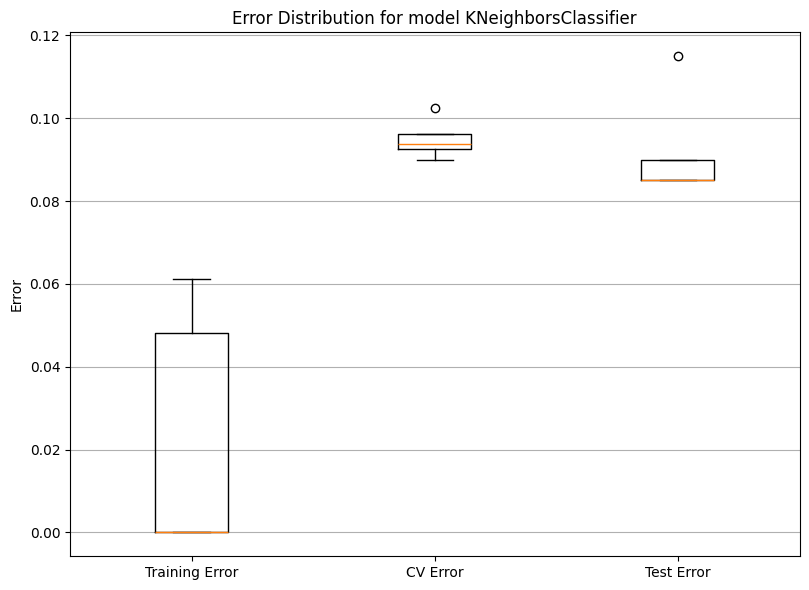

Evaluating LogisticRegression...
Best Params for Fold: {'C': 0.05}
Best Params for Fold: {'C': 0.08}
Best Params for Fold: {'C': 0.25}
Best Params for Fold: {'C': 0.25}
Best Params for Fold: {'C': 0.08}
Training Errors: [np.float64(0.018125000000000058), np.float64(0.015312499999999951), np.float64(0.0009375000000000355), np.float64(0.001875000000000071), np.float64(0.015625)]
CV Errors: [np.float64(0.09499999999999997), np.float64(0.10250000000000004), np.float64(0.09125000000000016), np.float64(0.09375), np.float64(0.10124999999999995)]
Test Errors: [0.09999999999999998, 0.12, 0.08499999999999996, 0.10499999999999998, 0.09999999999999998]
Mean Test Error: 0.1020 ± 0.0112


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


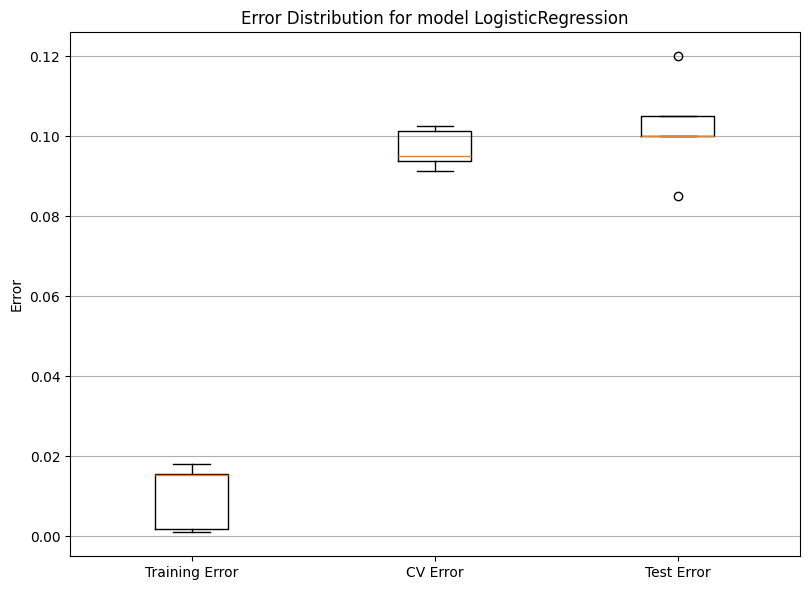

Evaluating RandomForestClassifier...
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Params for Fold: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Training Errors: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
CV Errors: [np.float64(0.08499999999999996), np.float64(0.08000000000000007), np.float64(0.07874999999999999), np.float64(0.07874999999999999), np.float64(0.07874999999999999)]
Test Errors: [0.09499999999999997, 0.07999999999999996, 0.06999999999999995, 0.06999999999999995, 0.10499999999999998]
Mean Test Error: 0.0840 ± 0.0139


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


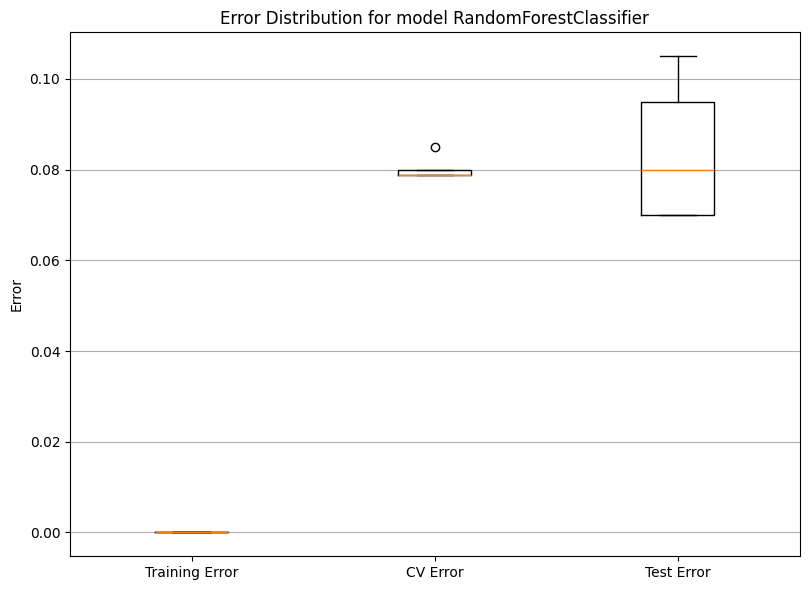

Evaluating LinearDiscriminantAnalysis...
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Best Params for Fold: {'solver': 'svd'}
Training Errors: [np.float64(0.009375000000000022), np.float64(0.009687500000000071), np.float64(0.009687499999999849), np.float64(0.01187500000000008), np.float64(0.009062499999999973)]
CV Errors: [np.float64(0.18000000000000005), np.float64(0.18375000000000008), np.float64(0.19124999999999992), np.float64(0.1975), np.float64(0.18499999999999994)]
Test Errors: [0.125, 0.16000000000000003, 0.125, 0.16500000000000004, 0.18000000000000005]
Mean Test Error: 0.1510 ± 0.0222


C:\Users\Kay Yan\AppData\Local\Temp\ipykernel_4396\4262728419.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([training_errors, cv_errors, test_errors], labels=['Training Error', 'CV Error', 'Test Error'])


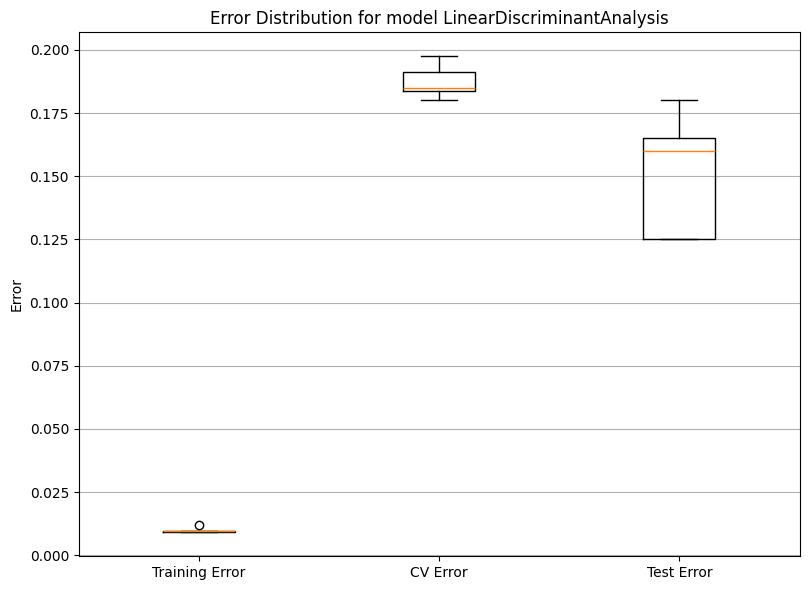

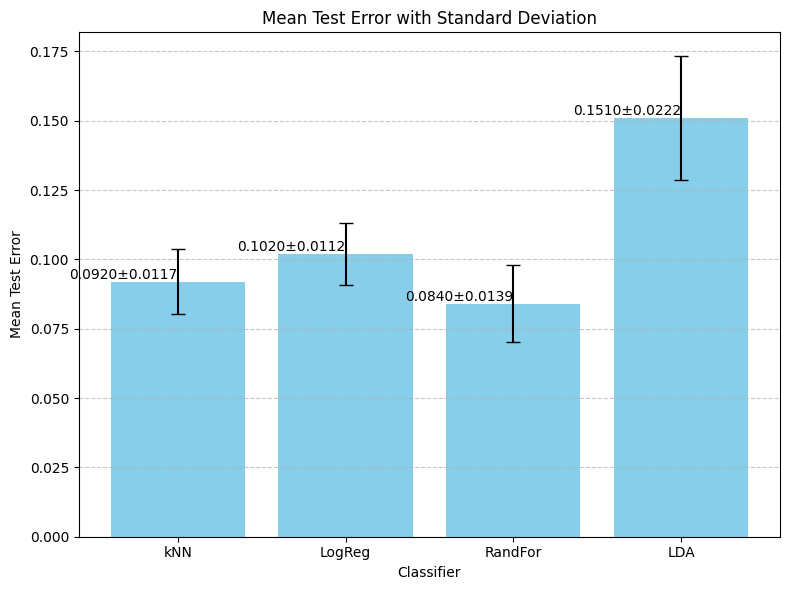

In [53]:
for size in data_size:
    print(f"Tuning models with data size: {size}")

    X, _, y, _ = train_test_split(pixels, labels, train_size=size, stratify=labels)

    classifiers_test_errors = {}
    for model in models:
        print(f"Evaluating {model.__class__.__name__}...")
        param_grid = param_grids[model.__class__]
        classifiers_test_errors[model.__class__.__name__] = double_CV(X, y, model, param_grid)

    plt.figure(figsize=(8, 6))
    plt.bar(classifiers_test_errors.keys(), [v[0] for v in classifiers_test_errors.values()], yerr=[v[1] for v in classifiers_test_errors.values()], capsize=5, color='skyblue')
    plt.xlabel('Classifier')
    plt.ylabel('Mean Test Error')
    plt.xticks(ticks=range(len(['kNN', 'LogReg', 'RandFor', 'LDA'])), labels=['kNN', 'LogReg', 'RandFor', 'LDA'])
    plt.title('Mean Test Error with Standard Deviation')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    for i in range(len(classifiers_test_errors)):
        mean = classifiers_test_errors[list(classifiers_test_errors.keys())[i]][0]
        std = classifiers_test_errors[list(classifiers_test_errors.keys())[i]][1]
        plt.text(i, mean, f'{mean:.4f}±{std:.4f}' , ha='right', va='bottom', fontsize=10, color='black')

    plt.show()
